## Linear regresion using normal equation and gradient descent

In [1]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

In [3]:
import tensorflow as tf
print(tf.__version__)

1.13.1


## the ideal  model is y=4+3x

In [4]:
X=2*np.random.rand(5,1)
y=4 + 3*X + np.random.randn(5,1)
print(X.shape)
print(y.shape)

(5, 1)
(5, 1)


In [5]:
X.ndim

2

In [6]:
y.ndim

2

In [7]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [8]:
y

array([[ 6.52628201],
       [10.71480112],
       [ 7.81108552],
       [ 7.0667811 ],
       [ 4.36473168]])

### X , y : column vector

In [9]:
data=np.hstack((X,y))

In [10]:
print(type(data))

<class 'numpy.ndarray'>


In [11]:
data.ndim

2

In [12]:
data

array([[ 0.74908024,  6.52628201],
       [ 1.90142861, 10.71480112],
       [ 1.46398788,  7.81108552],
       [ 1.19731697,  7.0667811 ],
       [ 0.31203728,  4.36473168]])

## Let's see the input versus output

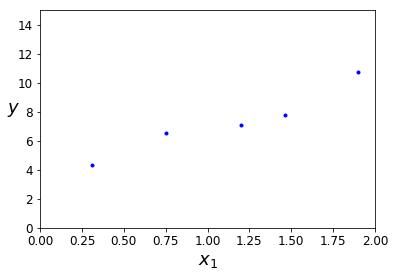

In [13]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## add x0=1 to each instance
## total 100 instances 

In [14]:
type(np.ones((100,1)))

numpy.ndarray

In [15]:
np.ones((100,1)).size

100

In [16]:
np.ones((100,1)).ndim

2

In [14]:
X_b=np.c_[np.ones((5,1)), X]   # add x0=1 to each instance
print(X_b.shape)
print(type(X_b))

(5, 2)
<class 'numpy.ndarray'>


In [15]:
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [16]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

## now let's try tensorflow, using batch gradient descent

In [17]:
m,n=X.shape
print(m,n)

5 1


In [26]:
n_epochs = 2
learning_rate = 0.01

XXX = tf.constant(X_b, dtype=tf.float32, name="XXX")
yyy = tf.constant(y, dtype=tf.float32, name="yyy")
theta = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(XXX, theta, name="predictions")
error = y_pred - yyy
mse = 0.5*tf.reduce_mean(tf.square(error), name="mse")
gradients = 1/m * tf.matmul(tf.transpose(XXX), error)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
grads=optimizer.compute_gradients(mse,theta)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        print(theta.eval())
        print("Epoch", epoch, "MSE =", mse.eval())
        print("use matrix formula=",sess.run(gradients))
        print("use TF_compute_gradient",sess.run(grads))
        sess.run(training_op)
        print("after train:",theta.eval())
        print(" ")

[[0.9045429 ]
 [0.35481548]]
Epoch 0 MSE = 19.707733
use matrix formula= [[-5.9931083]
 [-7.729606 ]]
use TF_compute_gradient [(array([[-5.993108],
       [-7.729605]], dtype=float32), array([[0.9045429 ],
       [0.35481548]], dtype=float32))]
after train: [[0.964474  ]
 [0.43211153]]
 
[[0.964474  ]
 [0.43211153]]
Epoch 1 MSE = 18.762787
use matrix formula= [[-5.846236]
 [-7.54083 ]]
use TF_compute_gradient [(array([[-5.846236 ],
       [-7.5408306]], dtype=float32), array([[0.964474  ],
       [0.43211153]], dtype=float32))]
after train: [[1.0229363 ]
 [0.50751984]]
 


In [22]:
0.9045429-0.01*(-5.993108)

0.9644739800000001

In [23]:
0.35481548-0.01*(-7.729606)

0.43211154

In [24]:
0.9644739800000001-0.01*(-5.846236)

1.02293634

In [25]:
0.43211154-0.01*(-7.5408306)

0.507519846